In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("processed_data/clean_olist_dataset.csv")
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,4.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,4.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,voucher,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,4.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,boleto,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,4.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,credit_card,3,179.12,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,5.0


In [3]:
df.shape

(104593, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104593 entries, 0 to 104592
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       104593 non-null  object 
 1   customer_id                    104593 non-null  object 
 2   order_status                   104593 non-null  object 
 3   order_purchase_timestamp       104593 non-null  object 
 4   order_approved_at              104580 non-null  object 
 5   order_delivered_carrier_date   104592 non-null  object 
 6   order_delivered_customer_date  104593 non-null  object 
 7   order_estimated_delivery_date  104593 non-null  object 
 8   customer_unique_id             104593 non-null  object 
 9   customer_zip_code_prefix       104593 non-null  int64  
 10  customer_city                  104593 non-null  object 
 11  customer_state                 104593 non-null  object 
 12  payment_sequential            

In [7]:
df.describe()

,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,review_score
count,104593.000000,104593.000000,104593.000000,104593.000000,104593.000000,104593.000000,104593.000000,103851.000000
mean,34624.809194,1.099873,2.691050,115.429174,1.144637,86.162125,18.288776,4.109898
std,29792.736457,0.720864,2.518599,75.237467,0.520756,71.422447,11.089812,1.322793
min,1003.000000,1.000000,0.000000,0.010000,1.000000,0.850000,0.000000,1.000000
25%,11030.000000,1.000000,1.000000,56.780000,1.000000,37.990000,12.790000,4.000000
50%,24020.000000,1.000000,1.000000,98.140000,1.000000,67.900000,15.940000,5.000000
75%,57085.000000,1.000000,4.000000,159.030000,1.000000,117.300000,19.680000,5.000000
max,99980.000000,26.000000,24.000000,344.340000,21.000000,3899.000000,215.430000,5.000000


In [8]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

In [9]:
df['payment_value'].sum()

np.float64(12073083.639999999)

In [10]:
df['order_id'].nunique()

88968

In [11]:
df['customer_unique_id'].nunique()

86173

C:\Users\HP\AppData\Local\Temp\ipykernel_19292\2652602779.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')['order_id'].nunique()


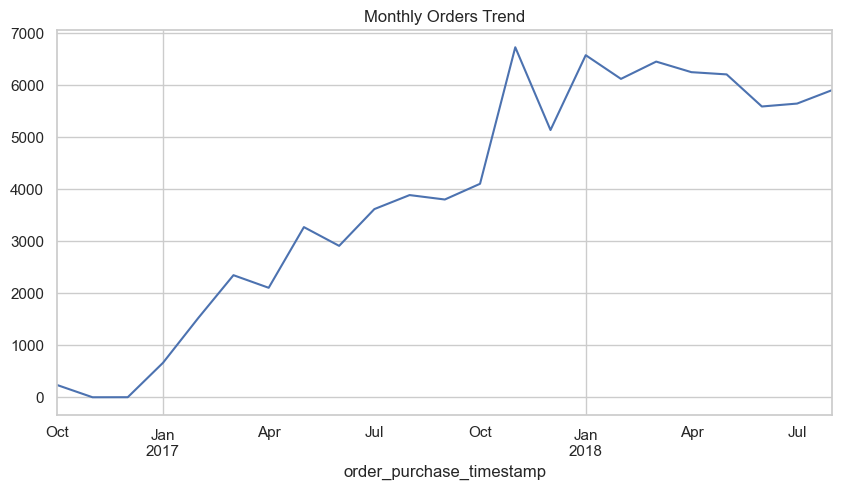

In [12]:
# Monthly Orders Trend
monthly_orders = df.set_index('order_purchase_timestamp') \
                   .resample('M')['order_id'].nunique()

plt.figure(figsize=(10,5))
monthly_orders.plot()
plt.title("Monthly Orders Trend")
plt.show()


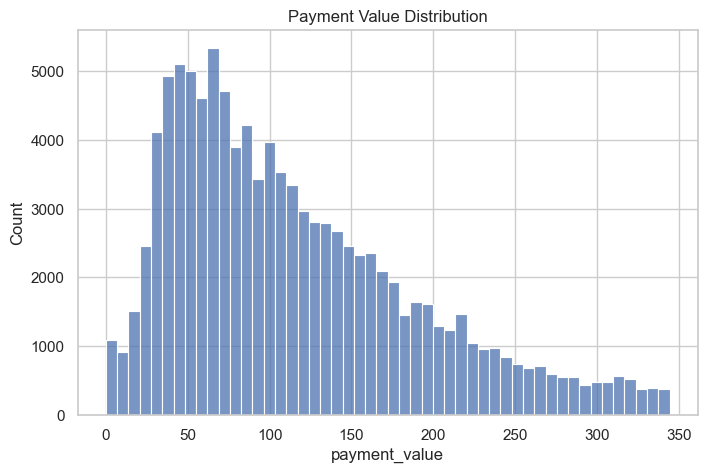

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df['payment_value'], bins=50)
plt.title("Payment Value Distribution")
plt.show()

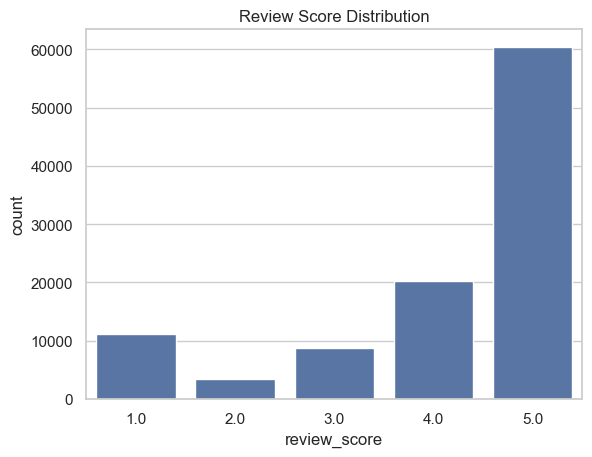

In [14]:
# Review Score Distribution
sns.countplot(x='review_score', data=df)
plt.title("Review Score Distribution")
plt.show()

In [15]:
# Define Reference Date
reference_date = df['order_purchase_timestamp'].max()

In [16]:
# Aggregate Customer Data
customer_df = df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,
    'order_id': 'nunique',
    'payment_value': 'sum',
    'review_score': 'mean'
}).reset_index()

In [17]:
# Rename Columns
customer_df.columns = [
    'customer_id',
    'Recency',
    'Frequency',
    'Monetary',
    'Avg_Review'
]

customer_df.head()

,customer_id,Recency,Frequency,Monetary,Avg_Review
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4.0
2,0000f46a3911fa3c0805444483337064,536,1,86.22,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,4.0
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,5.0
